In [184]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [185]:
main_dir = "D:\\Competitions\\DataStorm-Final-2021"
data_dir = os.path.join(main_dir,"data\\Data\\")
logs_dir = os.path.join(main_dir,"logs\\")
scripts_dir = os.path.join(main_dir,"src\\scripts\\")
model_dir = os.path.join(main_dir,"src\\models\\")
feature_dir = os.path.join(data_dir,"feature\\")

In [186]:
filename = "datastorm_agent_data.csv"
agent_df = pd.read_csv(os.path.join(data_dir,filename))
agent_sample = agent_df.sample(n=10)

In [187]:
filename = "part2.csv"
policy_df = pd.read_csv(os.path.join(feature_dir,filename))
policy_sample = policy_df.sample(n=10)

In [188]:
agent_sample.columns

Index(['agent_level', 'title', 'dob', 'gender', 'marital_status',
       'date_joined', 'status', 'substatus', 'termination_date', 'city_name',
       'cluster_code', 'agent_code', 'supervisor_code', 'zone_code',
       'region_code', 'designation'],
      dtype='object')

In [189]:
agent_df.shape

(14993, 16)

In [190]:
data_null_per = agent_df.isnull().sum()/agent_df.shape[0]
data_null_per

agent_level         0.000000
title               0.168212
dob                 0.236644
gender              0.221703
marital_status      0.649503
date_joined         0.016674
status              0.000000
substatus           0.016608
termination_date    0.554459
city_name           0.016674
cluster_code        0.008471
agent_code          0.386580
supervisor_code     0.386580
zone_code           0.386981
region_code         0.386580
designation         0.296005
dtype: float64

In [191]:
type(data_null_per)

pandas.core.series.Series

<AxesSubplot:>

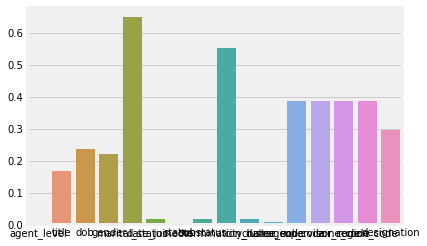

In [194]:
sns.barplot(x=data_null_per.index,y=data_null_per.values)

In [162]:
agent_df.dropna(axis=0,subset=["region_code"],inplace=True)


In [163]:
agent_df.isnull().sum()

agent_level            0
title                  0
dob                    0
gender                 0
marital_status      4753
date_joined            0
status                 0
substatus              0
termination_date    3974
city_name              0
cluster_code           0
agent_code             0
supervisor_code        0
zone_code              6
region_code            0
designation            0
dtype: int64

In [164]:
agent_df.shape

(9197, 16)

In [165]:
agent_df = agent_df[["agent_level","date_joined",'agent_code',"status","substatus","zone_code","region_code","designation"]]

In [166]:
policy_df.columns

Index(['main_holder_occupation_cd', 'policy_term', 'policy_payment_mode',
       'policy_status', 'commencement_dt', 'next_due_dt', 'main_holder_gender',
       'main_holder_dob', 'main_holder_entry_age', 'main_holder_smoker_flag',
       'total_sum_assuared', 'premium_value', 'child1_dob', 'child2_dob',
       'payment_method', 'policy_snapshot_as_on', 'client_code', 'agent_code',
       'product_code', 'policy_code', 'policy_snapshot', 'unique',
       'total_rider_prem', 'total_rider_sum_assuared', 'children_count',
       'month_rank', 'current_age', 'completed_duration', 'completed_ratio'],
      dtype='object')

In [167]:
policy_sample = policy_df.sample(n=50)

In [168]:
#region_agent = pd.Series(index=list(agent_df['agent_code']),data=agent_df['region_code'])

region_agent = agent_df[['agent_code','region_code']]
region_agent = region_agent.set_index('agent_code')

In [169]:
agent_df['region_code']

1        RA267
2        RA263
3        RA217
4        RA220
5        RA270
         ...  
14967    RA256
14968    RA276
14969    RA261
14970    RA286
14971    RA257
Name: region_code, Length: 9197, dtype: object

In [170]:
#region_agent.to_dict()

In [171]:
policy_df['region_code_client'] = policy_df['agent_code'].map(region_agent.to_dict()['region_code'])

In [172]:
policy_df.columns

Index(['main_holder_occupation_cd', 'policy_term', 'policy_payment_mode',
       'policy_status', 'commencement_dt', 'next_due_dt', 'main_holder_gender',
       'main_holder_dob', 'main_holder_entry_age', 'main_holder_smoker_flag',
       'total_sum_assuared', 'premium_value', 'child1_dob', 'child2_dob',
       'payment_method', 'policy_snapshot_as_on', 'client_code', 'agent_code',
       'product_code', 'policy_code', 'policy_snapshot', 'unique',
       'total_rider_prem', 'total_rider_sum_assuared', 'children_count',
       'month_rank', 'current_age', 'completed_duration', 'completed_ratio',
       'region_code_client'],
      dtype='object')

In [173]:
clients_in_region = policy_df.groupby(by=["region_code_client","policy_snapshot"])['client_code'].count()

In [174]:
clients_in_region = clients_in_region.reset_index(level=['policy_snapshot','region_code_client'])

In [175]:
clients_in_region.sort_values(by=["policy_snapshot"],ascending=True,inplace=True)

In [154]:
#clients_in_region.to_csv(feature_dir+"clients_in_region.csv",index=False)

In [179]:
def fixed_date(df):
    df['date_joined'] = pd.to_datetime(df['date_joined'])
    df.sort_values(by=["date_joined"],ascending=True,inplace=True)


def

In [180]:
fixed_date(agent_df)
